# STEP -1
### Feature Reduction - defined as Reducing Number of Features ,utilized for Classification. 
 Before we proceed with Classification - we "may need" - Feature Reduction.


# STEP -2
### Factor Analysis - Factor Analysis is not to be considered as a Feature or Dimension Reduction technique. 
  Quoting Prof Mitra IIT Kanpur - Source - http://textofvideo.nptel.iitm.ac.in/111104024/lec38.pdf
###   "FA explains the covariance structure or the  variance  covariance  structure, of  a  random  vector in terms  of  a  few  underlying  unobservable  factors." 

 According to Wiki quoted below - Exploratory Factor Analysis is the better option - compared to PCA 
###   " Clearly though, PCA is a more basic version of exploratory factor analysis (EFA) that was developed in the early days prior to the advent of high-speed computers. From the point of view of exploratory analysis, the eigenvalues of PCA are inflated component loadings, i.e., contaminated with error variance"

 Source --- https://en.wikipedia.org/wiki/Factor_analysis
 EFA , FA - Not done yet for this Data Set.


# STEP -3
### Principal Component Analysis - PCA 
 Cant be done for this Data Set as most Features are Categorical.  
 Source :-  http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
 If PCA were to be undertaken 
 - We can not include RESPONSE variable - Attrition.
 - Cant include any other Binomial Or Categorical Variables.
 - Categorical to be included only with advanced methods.
 - Advanced methods for PCA :- http://stats.stackexchange.com/questions/14002/whats-the-difference-between-principal-component-analysis-and-multidimensional/14013#14013
 - Advanced methods out of scope for now. 
### TBD -- Try again with "advanced methods" include Categorical Variables. 


# STEP -4
### Pre Processing Data 
### Standardize Variables :- 
   - "Democracy amongst Variables" lets ensure All features have- Mean =0 and Variance =1 

### Multiple options for SCALING and STANDARDIZATION with scikitlearn 
- Option -1 sklearn.preprocessing.scale - Done. Type= Function.
- Option -2 sklearn.preprocessing.StandardScaler -Done. Type= Utility Class. 
- Option -3 MinMax Scaler -Not Required with this DataSet.

# Dataset Train & Test Split -- k Fold CrossValidation with StartShuffleSplit - Done 

# STEP -5 
### Choosing Classifiers :- 

- Logistic Regression - Done 
- kNN - k Nearest Neighbour - Done [Highest Accuracy scores as of NOW]. 
- Naive Bayes - Done but rejected - as not a good choice for this Dataset. 
- Neural Network MLP - Multi Layer Perceptron - TBD 
- Support Vector Machine - TBD 
- Decision Tree - TBD 
- Random Forests - TBD 
- TPOT and other "Related Projects" -- http://scikit-learn.org/stable/related_projects.html#related-projects
- Pipeline the Classifiers - discover other options to auto-mate with Pipeline 
- Keras , TensorFlow , Theano - what else have you ? 


# STEP -6
### Model Evaluation
 Need to ensure CLASSIFICATION ACCURACY displayed by Model on any Test data set
 is greater than - Ratio of Classes in Sample or Population  [All Train + All Test sets] 

# STEP -7 - TBD 
### Data Visualization 
 Plot AUC and ROC Curves etc - look at own code from R Stats and earlier Python Notebooks incorporate data viz.  

# STEP -8
 Look at Excel worksheets and R Parallels for this Project - using same Sample Data Set. Compare Performance as per Accuracy and Time etc. 

# STEP 9 
 Further investigation - Survival Analysis :- predicting when an employee is most likely to Churn or Exit. 

### Data Source Employee Attrition Data == WATSON Sample Data Sets
 https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

### Refrence :- 
  - http://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering



In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import mixture
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

%matplotlib inline



In [2]:
# Pre Process- Data 
# Convert CSV file to TSV Shell Command ==> $  < FileName.csv tr "," "\t" > FileName.tsv


df=pd.read_csv('hr2.tsv',sep='\t')
df.head(5)

# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# Read TSV with \t 



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
mymap = {'Yes':1,'No':0,'Travel_Rarely':1, 'Travel_Frequently': 2 ,'Non-Travel':3, 'Research & Development' :1 , 
         'Human Resources':2,'Sales':3,'Life Sciences':1,'Medical':6,'Technical Degree':3,'Marketing':4,'Other':5,
        'Female':1, 'Male':2,'Research Scientist':1,'Laboratory Technician':2,'Healthcare Representative':3,
         'Manufacturing Director':4,'Manager':5,'Sales Representative':6,'Research Director':7,'Sales Executive':8,
        'Single':1,'Married':2,'Divorced':3}#Medical = 6 as HR =2 in another column

#
dfh =df.applymap(lambda s: mymap.get(s) if s in mymap else s)
#
dfh.head(5)
#
# In mymap == Yes =1 and No =0 - replacements made in both Attrition and OverTime
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html
# http://pandas.pydata.org/pandas-docs/stable/indexing.html

#dfh.to_csv('dfh_05DEC.csv') # Ok for down csv 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,3,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,6,1,5,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#InterimDF Dropped-Attr,EmployeeCount,EmployeeNumber ,Over18 and StandardHours
df1 = dfh.drop(df.columns[[1,8,9,21,26]],axis=1,inplace=False) 
print df1.shape
names = df1.columns.values
print "________________________________________"
print names
print "________________________________________"
df2 = pd.DataFrame(dfh["Attrition"]) #  Interim DF only - Attr
names1 = df2.columns.values
print names1
print df2.shape 
print df2["Attrition"].value_counts() # Here - 0 == Live Employee , 1 == Exited Employee / Attrited Employee 
#
#df3 = dfh[["Attrition","DailyRate"]] #  Interim DF only for PLotting - Attr + DailyRate
#df3 = dfh[["MonthlyRate","DailyRate"]] #  Interim DF only for PLotting - Attr + DailyRate
#print df3.head(5)

(2940, 30)
________________________________________
['Age' 'BusinessTravel' 'DailyRate' 'Department' 'DistanceFromHome'
 'Education' 'EducationField' 'EnvironmentSatisfaction' 'Gender'
 'HourlyRate' 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked'
 'OverTime' 'PercentSalaryHike' 'PerformanceRating'
 'RelationshipSatisfaction' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']
________________________________________
['Attrition']
(2940, 1)
0    2466
1     474
Name: Attrition, dtype: int64


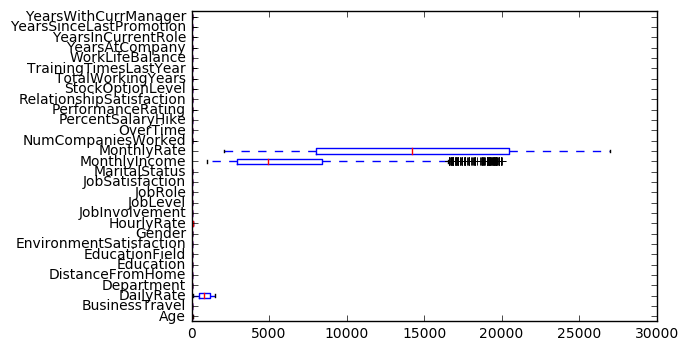

In [5]:
# Dataset boxplot for Means and Variances 
df1.plot(kind='box', vert=False)

# Seen below - Features have large Variance - data set needs std and scaling 

In [6]:
# Interim DF - Density plot
df3.plot(kind='kde')
# No inference drawn as of now - To be Explored ..........??? 


NameError: name 'df3' is not defined

In [7]:
# Convert DF to Numpy Array 
# 1st Numpy Array == X , only features 
# 2nd Numpy Array == y , only target Labels
import numpy as np

X = df1.iloc[:,0:30].values # All Features of - df1 besides Attr and AGE #TBD --- Need to ADD AGE ??? 
y = df2.iloc[:,0].values # Choosing only 1 - Target Feature from - dfh
#
print X.shape
print y.shape
#
print "_________________________________________________________"
print('Target Variable "Attrition":', (y))
print "_________________________________________________________"
print('Class labels for Target Variable "Attrition":', np.unique(y))
print "_________________________________________________________"
print('Percentage of Class Label ==1 = {:.4f}'.format(df2["Attrition"].mean()))
print('Percentage of Class Label ==0 = {:.4f}'.format(1-df2["Attrition"].mean()))
print "_________________________________________________________"
print "Model that Predicts 83.88% Accuracy is Non Predictor OR NO_Model- as it will always predict Dominant Class"
print "This dataset Dominant Class = ZERO or LIVE EMPLOYEE - we need more than 83.88% Accuracy Score."
print "_______________________________________________________#################__"

(2940, 30)
(2940,)
_________________________________________________________
('Target Variable "Attrition":', array([1, 0, 1, ..., 0, 0, 0]))
_________________________________________________________
('Class labels for Target Variable "Attrition":', array([0, 1]))
_________________________________________________________
Percentage of Class Label ==1 = 0.1612
Percentage of Class Label ==0 = 0.8388
_________________________________________________________
Model that Predicts 83.88% Accuracy is Non Predictor OR NO_Model- as it will always predict Dominant Class
This dataset Dominant Class = ZERO or LIVE EMPLOYEE - we need more than 83.88% Accuracy Score.
_______________________________________________________#################__


#### Source :-- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit
#### http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

"Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance
there could be several times more negative samples than positive samples. In such cases it is recommended to 
use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative 
class frequencies is approximately preserved in each train and validation fold."

#### As seen in the code cell below - we have chosen a certain value for a Random Seed . As long as we dont change this Random Seed value manually [ or write a function and pass a different  SEED Value to Random ] - we shall keep getting the exact same values for our Features within the X_train , X_test , y_train and y_test.   


Seed Values used for - random_state=123,124 etc 

In [8]:

from sklearn.model_selection import StratifiedShuffleSplit
#
print "__________________________________"

%time sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=124) # test_size=0.3 thus TRAIN_size =0.7 OR 70% 
sss.get_n_splits(X, y)

print "__________________________________"
print(sss)      
print "__________________________________"

for train_index, test_index in sss.split(X, y):
#    print("TRAIN:", train_index, "TEST:", test_index) # Printing INDEX Values not ACTUAL Feature Values 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape
#
np.savetxt("X_train.csv", X_train, delimiter=",") # Numpy arrays saved as CSV's 
np.savetxt("y_train.csv", y_train, delimiter=",") # Actual Values stored in these Numpy Arrays will Differ only... 
np.savetxt("X_test.csv", X_test, delimiter=",")   # ...when the Seed value is changed above - random_state
np.savetxt("y_test.csv", y_test, delimiter=",")


__________________________________
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 50.1 µs
__________________________________
StratifiedShuffleSplit(n_splits=10, random_state=124, test_size=0.3,
            train_size=None)
__________________________________
(2058, 30)
(2058,)
(882, 30)
(882,)


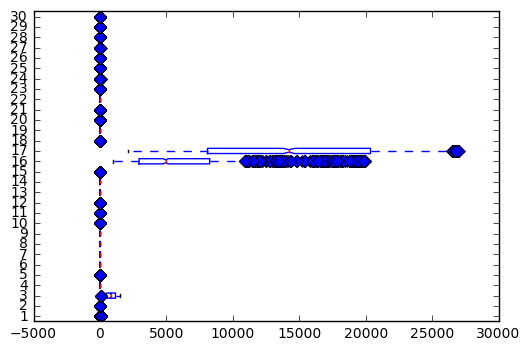

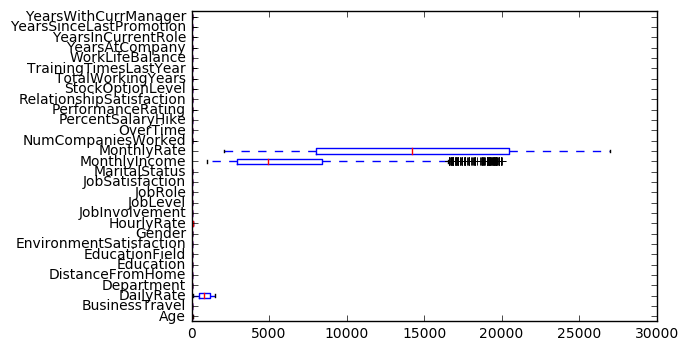

In [9]:
#http://matplotlib.org/examples/pylab_examples/boxplot_demo.html
import numpy as np
import matplotlib.pyplot as plt

# Compare - Pre and Post Standard Scaler Numpy Arrays 
plt.figure()
#plt.boxplot(X_train, 1,vert=False)
#plt.boxplot(X_train, 2,'gD',0)
plt.boxplot(X_train, 2,'gD',0,0.5)
plt.show()

#
# Dataset boxplot for Means and Variances 
df1.plot(kind='box', vert=False)

# We can see below - Features have very Varied Means and Variances - data set needs std and scaling 

In [42]:
# Source --  http://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes
# Gaussian Naive bayes -GaussianNB as 1st Classifier without any Feature Scaling 

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))




Number of mislabeled points out of a total 2058 points : 448


Cells below with Scaler and STD Scaler data - those are not Best options as regards ACCURACY scores - but we can not classify with Non Scaled Data as the Categorical Features we have are all having Diff Scales. Thus with this data set Naive Bayes is not a Good Choice of Classifier . 

#### random_state=124 --- Number of mislabeled points out of a total 2058 points : 448

#### Instantiated - Multinomial Naive Bayes - but didnt Fit or Predict as MNB cant be used with Negative Values of X_train it throws an error with scaled data. Error as seen below :-  

/home/dhankar/anaconda2/lib/python2.7/site-packages/sklearn/naive_bayes.pyc in _count(self, X, Y)
    688         """Count and smooth feature occurrences."""
    689         if np.any((X.data if issparse(X) else X) < 0):
--> 690             raise ValueError("Input X must be non-negative")
    691         self.feature_count_ += safe_sparse_dot(Y.T, X)
    692         self.class_count_ += Y.sum(axis=0)

ValueError: Input X must be non-negative


### Source - http://stackoverflow.com/questions/34725726/is-it-possible-apply-pca-on-any-text-classification
### Source - http://stackoverflow.com/questions/16123572/k-fold-cross-validation-for-naive-bayes-classifier

In [10]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train using X_train_scaled
%time nb.fit(X_train, y_train)


CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.66 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### How is STANDARD SCALER different from SCALER ??

  On the STANDARD SCALER  official documentation page - Scaler is mentioned as - "Equivalent function without the  object oriented API." But as seen in this notebook - data pre-processed with STANDARD SCALER provides a higher Accuracy Score upon model evaluation. 

- Other Scalers given - required / not required ?? MIN MAX SCaler Not required. 
- Docs for Scaler state dont Scale the Target Feature - BUT - MLP - Neural Net requires this ?? 

     Cells below - 1st RUN - Scale X_train ,X_test , y_train and y_test. 
     2nd RUN - STANDARD SCALER X_train ,X_test , y_train and y_test. 



In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
#
X_train_scaled = preprocessing.scale(X_train)
print X_train_scaled.shape 
print type(X_train_scaled)
print "_________________________________"
y_train_scaled = preprocessing.scale(y_train)
print y_train_scaled.shape 
print type(y_train_scaled)
print "_________________________________"

#print X_train_scaled # Ok Not required 
print "_________________________________"
print X_train_scaled.mean(axis=0) # Means Exponential e-16 or e-17, Why not ZERO's ? format the Floating Points 
print "_________________________________"
print X_train_scaled.std(axis=0)
print "_________________X-train-scaled___________________________________________________________________"
print('Feature == 0 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,0].mean()))
print('Feature == 0 -- Variance after Rescaling = {:.8f}'.format(X_train_scaled[:,0].std()))
print('Feature == 1 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,1].mean()))
print('Feature == 1 -- Variance after Rescaling = {:.8f}'.format(X_train_scaled[:,1].std()))
print('Feature == 2 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,2].mean()))
print('Feature == 3 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,3].mean()))
print('Feature == 4 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,4].mean()))
print('Feature == 5 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,5].mean()))
print('Feature == 6 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,6].mean()))
print('Feature == 7 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,7].mean()))
print('Feature == 8 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,8].mean()))
#
print "_________________y-train-scaled______________________________________________________________"
print('Feature == 0 -- Mean after Rescaling = {:.8f}'.format(y_train_scaled.mean()))
print('Feature == 0 -- Variance after Rescaling = {:.8f}'.format(y_train_scaled.std()))

#
print "_____________________________________________________________________________________________"
#
X_test_scaled = preprocessing.scale(X_test)
print X_test_scaled.shape 
#print type(X_test_scaled)
print "_________________________________"
y_test_scaled = preprocessing.scale(y_test)
print y_test_scaled.shape 
#print type(y_test_scaled)
print "_________________________________"

#print X_test_scaled # Ok Not required 
print "_________________________________"
print X_test_scaled.mean(axis=0) # 
print "_________________________________"
print X_test_scaled.std(axis=0)
print "________________X-Test-Scaled_______________________________________________________________"
print('Feature == 0 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,0].mean()))
print('Feature == 0 -- Variance after Rescaling = {:.8f}'.format(X_test_scaled[:,0].std()))
print('Feature == 1 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,1].mean()))
print('Feature == 1 -- Variance after Rescaling = {:.8f}'.format(X_test_scaled[:,1].std()))
print('Feature == 2 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,2].mean()))
print('Feature == 3 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,3].mean()))
print('Feature == 4 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,4].mean()))
print('Feature == 5 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,5].mean()))
print "________________y-Test-Scaled_______________________________________________________________"
print('Feature == 0 -- Mean after Rescaling = {:.8f}'.format(y_test_scaled.mean()))
print('Feature == 0 -- Variance after Rescaling = {:.8f}'.format(y_test_scaled.std()))


# Need to check - why -0.0000 values for Mean on Rescaling and do these impact the Predictions ? 

(2058, 30)
<type 'numpy.ndarray'>
_________________________________
(2058,)
<type 'numpy.ndarray'>
_________________________________
_________________________________
[ -1.75866232e-16  -5.04185830e-16   7.84384975e-17  -1.62595345e-16
   1.58603289e-16  -4.01484806e-16   1.74517565e-17  -4.39126114e-17
  -4.68850744e-16   3.08898787e-16   1.47274483e-17   1.98955419e-16
   1.04440805e-16  -2.70057165e-16   1.37078557e-16   4.66099462e-17
   1.12074263e-16   9.17093849e-17  -4.53152255e-18   5.08285779e-16
  -2.41573309e-16   8.37252738e-17   2.53846183e-16   6.74333713e-18
  -8.48851278e-17   1.14075686e-15  -2.89424030e-17  -8.13516191e-17
  -1.19222200e-16  -4.53691722e-17]
_________________________________
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
_________________X-train-scaled___________________________________________________________________
Feature == 0 -- Mean after Rescaling = -0.00000000
Feature

In [14]:
# Standardizing and Rescaling - 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

sc1 = StandardScaler()
sc1.fit(y_train)

#sc = preprocessing.StandardScaler().fit(X_train) # single line option chained code 

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test) #@Important Note --- Why not do a sc.fit(X_test) ? 
y_train_sc1 = sc1.transform(y_train)
y_test_sc1 = sc1.transform(y_test) 

# The means and STD values for X_test arent same as above with SCALER ? 

print X_train_sc.shape 
print type(X_train_sc)
print "_________________________________"
#print X_test_scaled # Ok Not required 
print "_________________________________"
print X_train_sc.mean(axis=0) # 
print "_________________________________"
print X_train_sc.std(axis=0)
print "________________X-Train-sc_______________________________________________________________"
print('Feature == 0 -- Mean after Rescaling = {:.4f}'.format(X_train_sc[:,0].mean()))
print('Feature == 0 -- Variance after Rescaling = {:.4f}'.format(X_train_sc[:,0].std()))
print('Feature == 1 -- Mean after Rescaling = {:.4f}'.format(X_train_sc[:,1].mean()))
print('Feature == 1 -- Variance after Rescaling = {:.4f}'.format(X_train_sc[:,1].std()))
print('Feature == 2 -- Mean after Rescaling = {:.8f}'.format(X_train_sc[:,2].mean()))
print('Feature == 3 -- Mean after Rescaling = {:.8f}'.format(X_train_sc[:,3].mean()))
print('Feature == 4 -- Mean after Rescaling = {:.8f}'.format(X_train_sc[:,4].mean()))
print('Feature == 5 -- Mean after Rescaling = {:.8f}'.format(X_train_sc[:,5].mean()))
print "________________y-Train-sc_______________________________________________________________"
print('Feature == 0 -- Mean after Rescaling = {:.4f}'.format(y_train_sc1.mean()))
print('Feature == 0 -- Variance after Rescaling = {:.4f}'.format(y_train_sc1.std()))

print X_test_sc.shape 
print type(X_test_sc)
print "_________________________________"
#print X_test_scaled # Ok Not required 
print "_________________________________"
print X_test_sc.mean(axis=0) # 
print "_________________________________"
print X_test_sc.std(axis=0)
print "_____________X-Test-sc__________________________________________________________________"
print('Feature == 0 -- Mean after Rescaling = {:.4f}'.format(X_test_sc[:,0].mean()))
print('Feature == 0 -- Variance after Rescaling = {:.4f}'.format(X_test_sc[:,0].std()))
print('Feature == 1 -- Mean after Rescaling = {:.4f}'.format(X_test_sc[:,1].mean()))
print('Feature == 1 -- Variance after Rescaling = {:.4f}'.format(X_test_sc[:,1].std()))
print('Feature == 2 -- Mean after Rescaling = {:.8f}'.format(X_test_sc[:,2].mean()))
print('Feature == 3 -- Mean after Rescaling = {:.8f}'.format(X_test_sc[:,3].mean()))
print('Feature == 4 -- Mean after Rescaling = {:.8f}'.format(X_test_sc[:,4].mean()))
print('Feature == 5 -- Mean after Rescaling = {:.8f}'.format(X_test_sc[:,5].mean()))
print "____________y-Test-sc___________________________________________________________________"
print('Feature == 0 -- Mean after Rescaling = {:.4f}'.format(y_test_sc1.mean()))
print('Feature == 0 -- Variance after Rescaling = {:.4f}'.format(y_test_sc1.std()))


(2058, 30)
<type 'numpy.ndarray'>
_________________________________
_________________________________
[ -1.75866232e-16  -5.04185830e-16   7.84384975e-17  -1.62595345e-16
   1.58603289e-16  -4.01484806e-16   1.74517565e-17  -4.39126114e-17
  -4.68850744e-16   3.08898787e-16   1.47274483e-17   1.98955419e-16
   1.04440805e-16  -2.70057165e-16   1.37078557e-16   4.66099462e-17
   1.12074263e-16   9.17093849e-17  -4.53152255e-18   5.08285779e-16
  -2.41573309e-16   8.37252738e-17   2.53846183e-16   6.74333713e-18
  -8.48851278e-17   1.14075686e-15  -2.89424030e-17  -8.13516191e-17
  -1.19222200e-16  -4.53691722e-17]
_________________________________
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
________________X-Train-sc_______________________________________________________________
Feature == 0 -- Mean after Rescaling = -0.0000
Feature == 0 -- Variance after Rescaling = 1.0000
Feature == 1 -- Mean after Rescalin

/home/dhankar/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/dhankar/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/dhankar/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if

In [15]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#clf.fit(X_train_sc, y_test_sc1)                         

MLPC = MLPClassifier(random_state=2)

MLPC.fit(X_train,y_train)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Neural Network - Multi-layer Perceptron (MLP)
#### The disadvantages of Multi-layer Perceptron (MLP) include:
 - MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
 - MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers,and iterations. 
 - MLP is sensitive to feature scaling.


Scaling Data - Train and Test sets both for MLP - Multi-layer Perceptron is sensitive to feature scaling, 
so it is highly recommended to scale your data. For example, scale each attribute on the input 
vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply
the same scaling to the test set for meaningful results. You can use StandardScaler for standardization.


In [16]:
scores = cross_val_score(MLPC,X_test,y_test,cv=5,scoring='accuracy')



print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.84 (+/- 0.00)


In [17]:
# Gaussian Naive bayes -GaussianNB as 1st Classifier without any Feature Scaling 

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))



Number of mislabeled points out of a total 2058 points : 448


'\nRAW DATA -- Number of mislabeled points out of a total 2058 points : 399\n\nSTD SCALER --- Number of mislabeled points out of a total 2058 points : 412\n\nSCALER --- Number of mislabeled points out of a total 2058 points : 412\n\n'

#### Source --  http://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes

RAW DATA -- Number of mislabeled points out of a total 2058 points : 399

STD SCALER --- Number of mislabeled points out of a total 2058 points : 412

SCALER --- Number of mislabeled points out of a total 2058 points : 412

Instantiate - Multinomial Naive Bayes - Error thrown by MNB is as seen above 

Basis these Questions -- http://stats.stackexchange.com/questions/169400/naive-bayes-questions-continus-data-negative-data-and-multinomialnb-in-scikit
http://stackoverflow.com/questions/34725726/is-it-possible-apply-pca-on-any-text-classification

We use only GaussianNB and not MultinomialNB with Scaler and STD Scaler Data.  


In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
%time nb.fit(X_train, y_train) # Just a print of the Fit this is Not used as we cant use Raw Unscaled Data

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 2.73 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
# 1st RUN - KNN - with X_train_scaled and y_train 
# 2nd RUN - KNN - with X_train_sc and y_train 
#

from sklearn.neighbors import KNeighborsClassifier

# Instantiate kNN model with 1 Neighbour 
knn = KNeighborsClassifier(n_neighbors=1)

# Fit kNN model with Train data (occurs in-place)
#knn.fit(X_train_scaled, y_train)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [20]:
# 1st RUN - predict kNN Class with with X_test_scaled
# 2nd RUN - predict kNN Class with with X_test_sc

#y_pred_class_kNN = knn.predict(X_test_scaled)
y_pred_class_kNN = knn.predict(X_test_sc)

y_pred_class_kNN.shape

(882,)

In [21]:

from sklearn import metrics

print type(y_pred_class_kNN)
print len(y_pred_class_kNN)
print "__________________________________________"
print len(y_test)
print('Logistic Reg Model predicted classes: {}'.format(y_pred_class_kNN))
print('Actual data - Real classes: {}'.format(y_test))
print "__________________________________________"
print metrics.accuracy_score(y_test, y_pred_class_kNN)
print "_____Model Evaluation with AUC Area Under the Curve __________________"
print metrics.roc_auc_score(y_test, y_pred_class_kNN)
#
print(metrics.classification_report(y_test, y_pred_class_kNN))


<type 'numpy.ndarray'>
882
__________________________________________
882
Logistic Reg Model predicted classes: [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 

# MODEL EVALUATION :- Accuracy Score of kNN - ROC and AUC 


Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality 
using cross-validation.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. 
This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, 
and a true positive rate of one. This is not very realistic, but it does mean that a larger area under 
the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate 
while minimizing the false positive rate.

### Calculated earlier = 1-dfh["Attrition].mean() = 83.88% 

#### Random_State Seed Value = 124 , for the Non PCA Data set :- 

Accuracy Score = 0.943310657596 = 94.33%
AUC-Area Under the Curve Score = 0.886543585839 = 88.65%


             precision    recall  f1-score   support

          0       0.96      0.97      0.97       740
          1       0.84      0.80      0.82       142
    avg / total       0.94      0.94      0.94       882

#### Random_State Seed Value = 123 , for the Non PCA Data set :- 

Accuracy Score = 0.950113378685 = 95.01%
AUC-Area Under the Curve Score = 0.890597639893 = 89.05%

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       740
          1       0.88      0.80      0.84       142
          avg / total       0.95      0.95      0.95       882

#### Random_State Seed Value = 123 , for the Non PCA Data set :- 

Accuracy Score = 0.945578231293 = 94.55%
AUC-Area Under the Curve Score = 0.878800355589 = 87.88%

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       737
          1       0.88      0.78      0.82       145
          avg / total       0.94      0.95      0.94       882


#### Random_State Seed Value = 123 , for the Non PCA and SCALER Data set :- 

Accuracy Score = 0.943310657596 = 94.33%
AUC-Area Under the Curve Score = 0.871903803865 = 87.19%

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       737
          1       0.87      0.77      0.82       145
          avg / total       0.94      0.94      0.94       882

#### Random_State Seed Value = 123 , for the Non PCA and SCALER Data set :- 


Accuracy Score = 0.922902494331 = 92.29% 
AUC-Area Under the Curve Score = 0.865231834558 = 86.52%

             precision    recall  f1-score   support

          0       0.96      0.95      0.95       737
          1       0.76      0.78      0.77       145
          avg / total       0.92      0.92      0.92       882
          
          
#### PCA data set --- Exactly same with multiple runs - seed or no seed -- 

Accuracy Score = 0.834467120181 = 83.44% 

            precision    recall  f1-score   support

          0       0.84      1.00      0.91       737
          1       0.00      0.00      0.00       145       ## Notice all ZERO's,none of Class[1] Predicted ?? 
      avg / total       0.70      0.83      0.76       882

#### Random_State Seed Value = 123 , No PCA or Scaling , Feature AGE Dropped :- 

Accuracy Score = 0.878684807256 = 87.86% 
AUC-Area Under the Curve Score = 0.672582229916 = 67.25%


             precision    recall  f1-score   support

          0       0.89      0.98      0.93       737
          1       0.78      0.37      0.50       145      
          avg / total       0.87      0.88      0.86       882


#### Random_State Seed Value = 123 , No PCA or Scaling , Feature AGE Included  :- 

Accuracy Score = 0.863945578231 = 86.39%
AUC-Area Under the Curve Score = 0.613905394657 = 61.39%

             precision    recall  f1-score   support

          0       0.87      0.99      0.92       737
          1       0.78      0.24      0.37       145
          avg / total       0.85      0.86      0.83       882




In [22]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [23]:
#Logistic Regression Model Fit 

%time logreg.fit(X_train_scaled, y_train)
print(logreg.intercept_)
print "____________________________"
print(logreg.coef_)



CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 63.1 ms
[-2.43467594]
____________________________
[[-0.28281214 -0.06865344 -0.15885479  0.67186757  0.27358832  0.07540101
  -0.00433378 -0.43558162  0.20390588 -0.03418581 -0.40135786 -0.20479336
  -0.31436942 -0.35689065 -0.41957143 -0.24106273  0.06302135  0.44600793
   0.78759558 -0.18759866  0.12875279 -0.19616799 -0.21005523 -0.36324546
  -0.09413943 -0.17893154  0.42517052 -0.47481225  0.45397709 -0.33350754]]


### Random State Seed= 124 Non PCA Non Scaled Data - Model Trained using X_train_scaled  
CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 63.1 ms
[-2.43467594]
____________________________
[[-0.28281214 -0.06865344 -0.15885479  0.67186757  0.27358832  0.07540101
  -0.00433378 -0.43558162  0.20390588 -0.03418581 -0.40135786 -0.20479336
  -0.31436942 -0.35689065 -0.41957143 -0.24106273  0.06302135  0.44600793
   0.78759558 -0.18759866  0.12875279 -0.19616799 -0.21005523 -0.36324546
  -0.09413943 -0.17893154  0.42517052 -0.47481225  0.45397709 -0.33350754]]


### Non PCA Non Scaled Data - Model Trained using X_train

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 326 ms
[-2.36830026]
____________________________
[[-0.22926078  0.02842471 -0.12015534  0.53251037  0.27349992 -0.00501477
  -0.07026319 -0.43308996  0.14688605 -0.05153573 -0.29965872 -0.32116135
  -0.21602175 -0.44955459 -0.43029879 -0.14698227  0.08871293  0.38247998
   0.73392199 -0.2554244   0.18246334 -0.23867643  0.         -0.17085906
  -0.29944854 -0.10888722 -0.15189001  0.5286157  -0.47053308  0.51628589
  -0.46213338]]


### Random State Seed= 123 Non PCA Non Scaled Data - Model Trained using X_train  


CPU times: user 68 ms, sys: 4 ms, total: 72 ms
Wall time: 524 ms
[ 0.00057899]
____________________________
[[ -2.41465872e-02  -4.92080733e-03  -2.34642609e-04   1.68309915e-01
    2.70271877e-02  -9.01246489e-03  -2.26917398e-02  -3.27923361e-01
    4.00104704e-02  -1.85470147e-03  -2.56502435e-01  -5.68589051e-02
    8.84412682e-02  -3.24237113e-01  -3.16467654e-01  -1.25498378e-04
    8.15611102e-06   1.60560664e-01   4.71414431e-01  -3.66879867e-02
    5.26985015e-02  -1.40384273e-01   4.63188771e-02  -2.98077801e-01
   -2.60246042e-02  -1.15840781e-01  -1.15749399e-01   7.66046992e-02
   -1.17914023e-01   1.45985087e-01  -1.31963175e-01]]



In [24]:
# make class predictions for X_test # the MODEL PRED 
# make class predictions for X_test_scaled # the MODEL PRED == y_pred_class_scaled

y_pred_class_scaled = logreg.predict(X_test_scaled)
print type(y_pred_class_scaled)

<type 'numpy.ndarray'>


In [13]:
# calculate predicted probabilities for X_test(well calibrated)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
#y_pred_prob #Ok print not required 

In [25]:
from sklearn import metrics


print len(y_pred_class_scaled)
print "__________________________________________"
print len(y_test)
print('Logistic Reg Model predicted classes: {}'.format(y_pred_class_scaled))
print('Actual data - Real classes: {}'.format(y_test))
print "__________________________________________"
print metrics.accuracy_score(y_test, y_pred_class_scaled)
print "_____Model Evaluation with AUC Area Under the Curve __________________"
print metrics.roc_auc_score(y_test, y_pred_class_scaled)
#
print(metrics.classification_report(y_test, y_pred_class_scaled))



882
__________________________________________
882
Logistic Reg Model predicted classes: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 

### Random Seed = 124 

Accuracy Score = 0.874149659864
AUC-Area Under the Curve Score = 0.66321850019

             precision    recall  f1-score   support

          0       0.89      0.97      0.93       740
          1       0.72      0.35      0.47       142
          avg / total       0.86      0.87      0.86       882


### Random Seed = 123 , Scaler Data -- 
Accuracy Score = 0.891156462585 = 89.11% 
AUC-Area Under the Curve Score = 0.704653597259

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       740
          1       0.80      0.43      0.56       142
          avg / total       0.88      0.89      0.88       882



### Random Seed = 123 , Scaler Data -- 
0.877551020408 = 87.75% 
_____Model Evaluation with AUC Area Under the Curve __________________
0.669133954054 = 66.91% 
             precision    recall  f1-score   support

          0       0.89      0.98      0.93       737
          1       0.78      0.36      0.49       145

avg / total       0.87      0.88      0.86       882



### Random Seed = 123 , PCA Data -- 

0.834467120181
precision    recall  f1-score   support

          0       0.84      1.00      0.91       737
          1       0.00      0.00      0.00       145  
          avg / total       0.70      0.83      0.76       882

2nd RUN ...##########################################################################
Non PCA Data Set with Seed 123 -- Feature AGE Not Included 

_Model Evaluation Accuracy Score
0.878684807256 == 87.86% , Accuracy Score - which is OK not Good as a Non Model is supposed to have - 
As calculated above earlier = 1-dfh["Attrition].mean() == 83.88% 

Model Evaluation with AUC Area Under the Curve __________________
0.672582229916 = 67.25%

0.878684807256
             precision    recall  f1-score   support

          0       0.89      0.98      0.93       737
          1       0.78      0.37      0.50       145      ##### Notice All Non ZERO's === 

avg / total       0.87      0.88      0.86       882

3rd RUN ...##############################################################################
Non PCA Data Set with Seed 123 -- Feature AGE Included 


Model Evaluation Accuracy Score
0.863945578231 = 86.39%

#2_____Model Evaluation with AUC Area Under the Curve __________________
0.613905394657 = 61.39%
             precision    recall  f1-score   support

          0       0.87      0.99      0.92       737
          1       0.78      0.24      0.37       145

avg / total       0.85      0.86      0.83       882

### print the confusion matrix

         PRED      PRED
    _____0___________1________
ACTUAL | TN   |     FP
  0    |      |
    ________________________
ACTUAL | FN   |     TP
  1    |      |
    ________________________

2nd RUN ---
array([[722== TN,  15 == FP],
       [ 92== FN,  53 == TP]])
       
3rd RUN ---
[[727  10]
 [110  35]]
       


In [41]:
#print the True positives # Check Term -- "True positives" 

X_test[y_test == y_pred_class]

T_Positives = X_test[y_test == y_pred_class]

print type(T_Positives)

print T_Positives.shape
# (775, 30) == 722 + 53 == Diagonal 1 

print T_Positives

<type 'numpy.ndarray'>
(762, 31)
[[  35    1  882 ...,    9    0    8]
 [  31    2  667 ...,    0    0    0]
 [  30    1  317 ...,    4    0    2]
 ..., 
 [  24    1  506 ...,    2    1    2]
 [  31    1 1079 ...,    2    1    4]
 [  36    3 1229 ...,    7    0    7]]


In [42]:
# print the True Negatives # Check Term -- "T_Negatives" 

X_test[y_test != y_pred_class]

T_Negatives = X_test[y_test != y_pred_class]

print type(T_Negatives)

print T_Negatives.shape

print T_Negatives

# 146 = 145 + 1 --- from the Diagonal of Confusion Matrix seen above 


'''

<type 'numpy.ndarray'>
(146, 12)
[[  31  667    1 ...,    0    0    0]
 [  29  992    1 ...,    2    1    5]
 [  26  342    2 ...,    2    1    2]
 ..., 
 [  34  988   23 ...,    2    0    2]
 [  26 1330   21 ...,    1    0    0]
 [  25  383    9 ...,    2    2    2]]



'''

<type 'numpy.ndarray'>
(120, 31)
[[  29    1  992 ...,    2    1    5]
 [  41    1 1085 ...,    7    1    0]
 [  29    1  408 ...,    8    3   10]
 ..., 
 [  21    1  501 ...,    2    1    2]
 [  34    2  988 ...,    2    0    2]
 [  26    1 1330 ...,    1    0    0]]


"\n\n<type 'numpy.ndarray'>\n(146, 12)\n[[  31  667    1 ...,    0    0    0]\n [  29  992    1 ...,    2    1    5]\n [  26  342    2 ...,    2    1    2]\n ..., \n [  34  988   23 ...,    2    0    2]\n [  26 1330   21 ...,    1    0    0]\n [  25  383    9 ...,    2    2    2]]\n\n\n\n"

In [37]:
# print the false positives

X_test[y_test < y_pred_class]

False_Positives = X_test[y_test < y_pred_class]
print type(False_Positives)

print False_Positives.shape

print False_Positives

<type 'numpy.ndarray'>
(1, 12)
[[   32   267    29    49  2837 15919    13     6     6     2     4     1]]


In [38]:
# print the false negatives 

False_Negatives = X_test[y_test > y_pred_class]
print type(False_Negatives)

print False_Negatives.shape

print False_Negatives

<type 'numpy.ndarray'>
(145, 12)
[[  31  667    1 ...,    0    0    0]
 [  29  992    1 ...,    2    1    5]
 [  26  342    2 ...,    2    1    2]
 ..., 
 [  34  988   23 ...,    2    0    2]
 [  26 1330   21 ...,    1    0    0]
 [  25  383    9 ...,    2    2    2]]


In [14]:
type(y_pred_class)

numpy.ndarray

In [15]:
y_pred_class.shape

(882,)

In [43]:
# Correlation from DF Data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

corr_df1 = df1.corr(method='pearson')

#print("--------------- CORRELATIONS ---------------")

#print(corr_dfpca.head(len(dfpca))) # Not required as we are plottng the Correlation 

# We can look at Column 1 of the Print out below - see what all Features have a 
# greater than 0.1 Corr value - Negative or Positive both considered . 

--------------- CREATE A HEATMAP ---------------


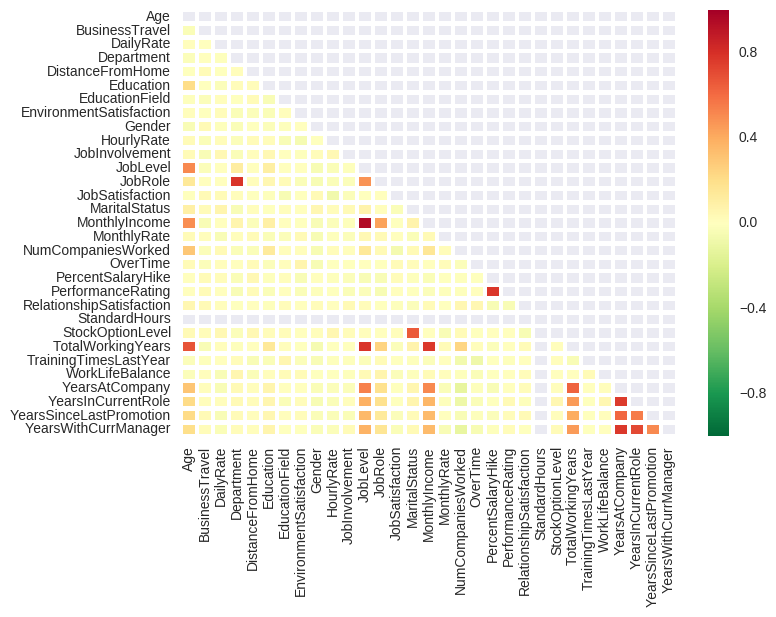

In [45]:
print("--------------- CREATE A HEATMAP ---------------")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df1)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_df1, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [ ]:
# Watch this space for more 

In [8]:
#Sandbox Code - Not required anymore 

#
# We are now using - from sklearn.model_selection import StratifiedShuffleSplit

#
#Add version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
import random
random.seed(123) # if NO seed - we get non-reproducible results 

#Split data - 70% training, 30% test set:

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#
print X_train.shape
print X_test.shape
print y_train.shape # Pred Variable Only - Attrition--  Train Set 
print y_test.shape  # Pred Variable Only - Attrition--  Test Set 


(2058, 31)
(882, 31)
(2058,)
(882,)


In [28]:
##### Sandbox from -- http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler
# OK 

X_train1 = np.array([[1,2,3],[4,5,6],[12,13,14]])

print X_train1.shape 

from sklearn import preprocessing
from sklearn.preprocessing import scale

X_trn_scaled = preprocessing.scale(X_train1)

print type(X_trn_scaled)

print "_________________________________"
print X_trn_scaled
print "_________________________________"
print X_trn_scaled.mean(axis=0)
print "_________________________________"
print X_trn_scaled.std(axis=0)

(3, 3)
<type 'numpy.ndarray'>
_________________________________
[[-1.00514142 -1.00514142 -1.00514142]
 [-0.35897908 -0.35897908 -0.35897908]
 [ 1.3641205   1.3641205   1.3641205 ]]
_________________________________
[ 0.  0.  0.]
_________________________________
[ 1.  1.  1.]
